## ライブラリ再読み込み ##
+ ライブラリを修正したときにこのノートを実行後、ライブラリのインポートから再実行すると、修正後のライブラリが実行される。

In [ ]:
import importlib
import fastf1lib
importlib.reload(fastf1lib)

## 初期化 ##
ライブラリをローカルパスから読み込むため、ライブラリのあるディレクトリをパスに追加してから読み込む。

In [1]:
import sys
import importlib
sys.path.append("libs")
from fastf1lib import myFastf1

ff1 = myFastf1()

## セッション読み込み ##
#### 引数 ####
1. グランプリ名(国名やサーキット名等、特定できる文字であれば fastf1 側で処理してくれる)
1. 開催年
1. セッション(後述)
1. キャッシュパス

セッションは以下の文字列を使用するか、数字 (FP1 が 1、FP2 が 2、レースは 5 など) で指定する。
+ Race: 'R'
+ Qualify: 'Q'
+ Sprint：'S'
+ Sprint Shootout： 'SQ'
+ FP1～3: 'FP1', 'FP2', 'FP3'

キャッシュパスは、フォルダが存在しないとエラーになる。
また、相対パスで記述する場合は、ライブラリではなく、呼び出す側のファイルとの相対パスで指定すること。

#### 戻り値 ####
セッションオブジェクト
(後続の処理で使用する)

In [2]:
session_race = ff1.load_session_o("mexico", 2023, 'R', '/work/fastf1/cache/')
session_qual = ff1.load_session_o("mexico", 2023, 'Q', '/work/fastf1/cache/')


core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.1.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '16', '55', '4', '63', '3', '81', '23', '31', '10', '22', '27', '24', '77', '2', '18', '14', '20', '11']
core           INFO 	Loading data for Mexico City Grand Pr

## 2ドライバーのテレメトリーデータ比較 ##
#### 引数 ####
1. セッションオブジェクト
1. ドライバー1
1. ドライバー2

ドライバーの指定は、3文字省略形、またはカーナンバー

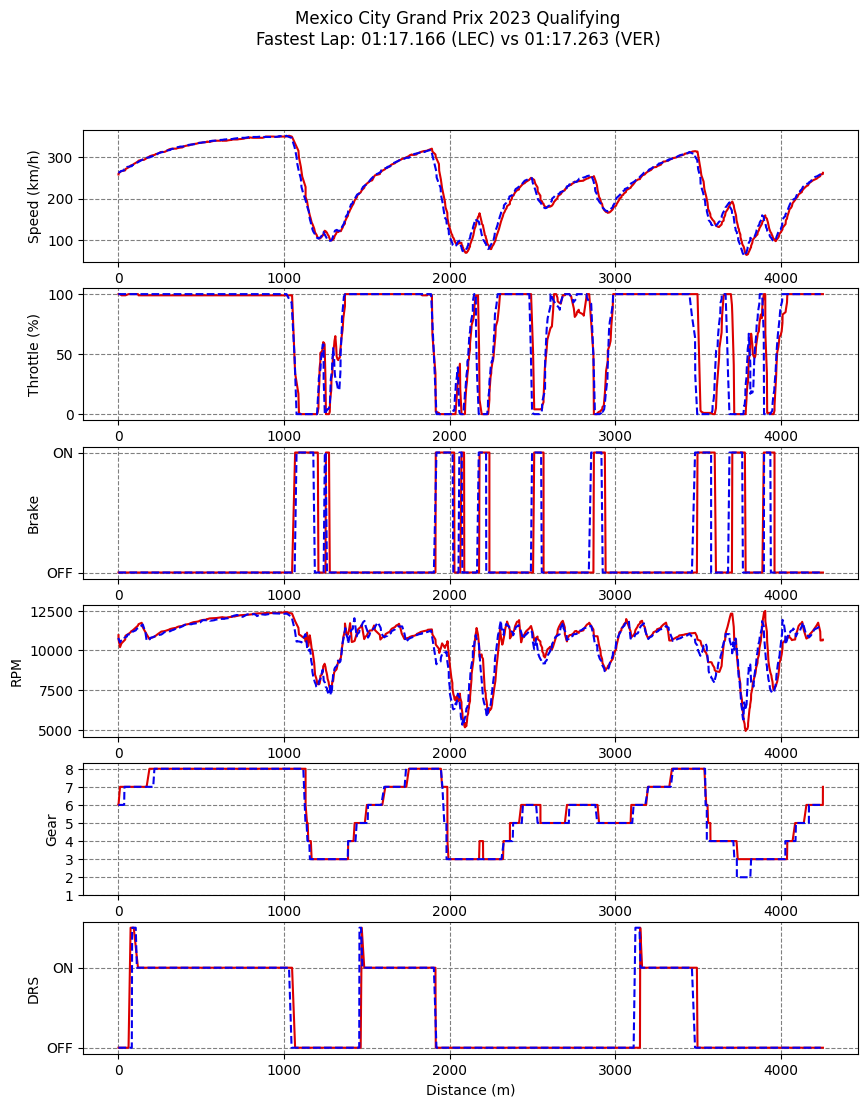

In [3]:
ff1.datachart_compare(session_qual, 'LEC', 'VER')

## 複数ドライバーのラップタイム推移を比較 ##
#### 引数 ####
1. セッションオブジェクト
1. ドライバーリスト

ドライバーリストは、[] で囲んで , で区切って記載する。  
ドライバーリストの最初に指定したドライバーを基準タイム(0の線)として表示する。

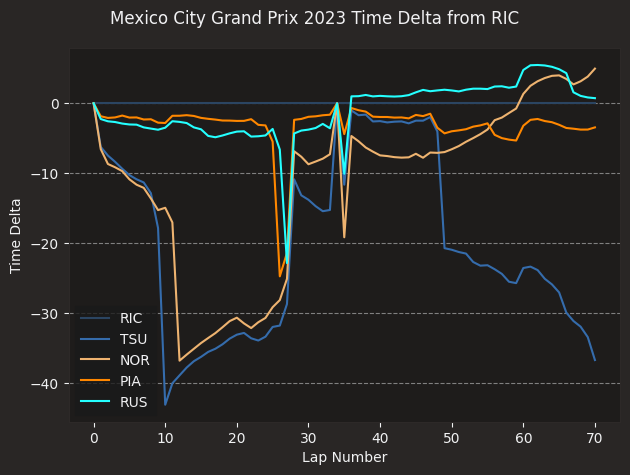

In [6]:
ff1.deltatime_comperition(session_race, ['3', '22', '4', '81', '63'])

## ドライバーのラップタイム一覧 ##
#### 引数 ####
1. セッションオブジェクト
1. ドライバー名

タイヤコンパウントで色分けしてラップタイムをプロットする。  
[To Do]FutureWarning が出るのを修正する。

/work/fastf1-libs/libs/fastf1lib.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_laps['Compound'].loc[driver_laps['Compound'] == 'TEST_UNKNOWN'] = 'TEST-UNKNOWN'
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remo

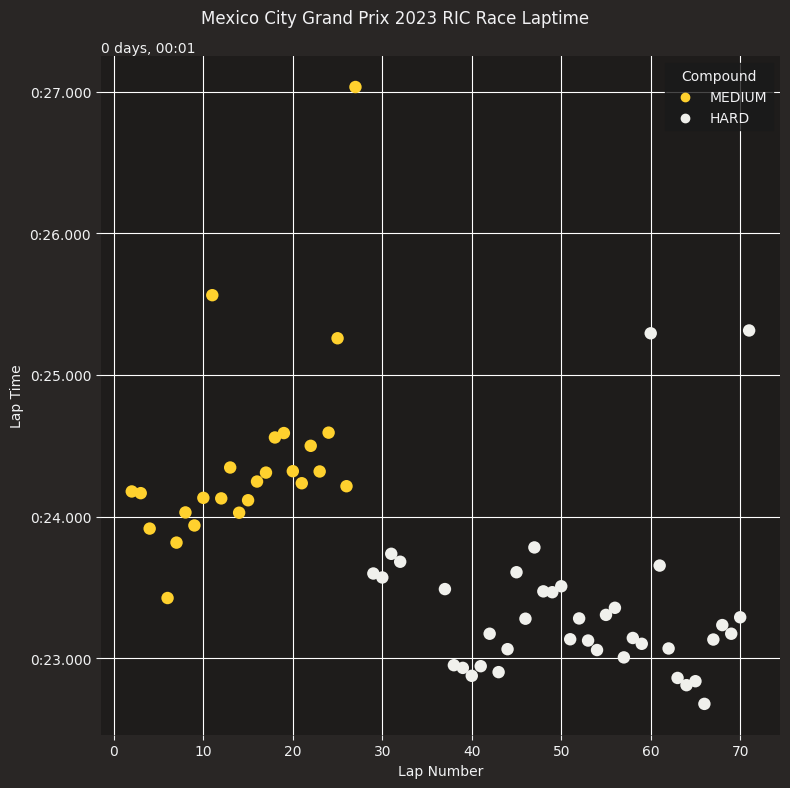

In [7]:
ff1.driver_laptime(session_race, 'RIC')

## 平均タイムとのタイム差 ##
#### 引数 ####
1. セッションオブジェクト
1. ドライバーリスト
1. x 軸最大値
1. x 軸最小値
1. 開始周回数(省略時は0)
1. 終了周回数(省略時は最終周)

ドライバーリストは [] で囲んで , で区切って記載する。  
ドライバーリストの先頭の平均ラップタイムを 0 とする。  
セーフティーカー先導等、遅いラップを挟むと平均値が上手く計算できない。赤旗中断を挟むと意図したグラフにならない。

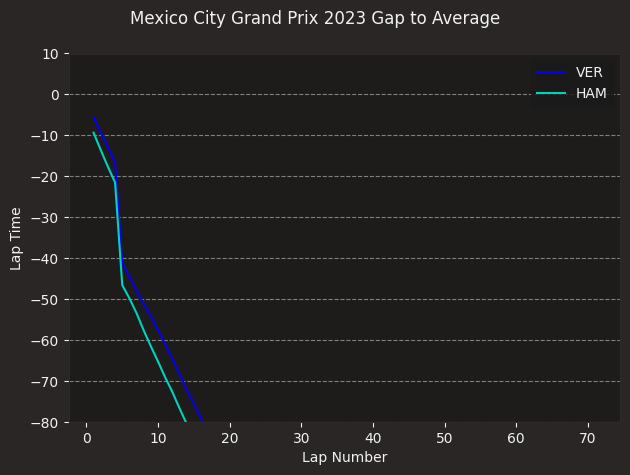

In [7]:
ff1.gap_to_average(session_race, [1, 44], 10, -80, 0)

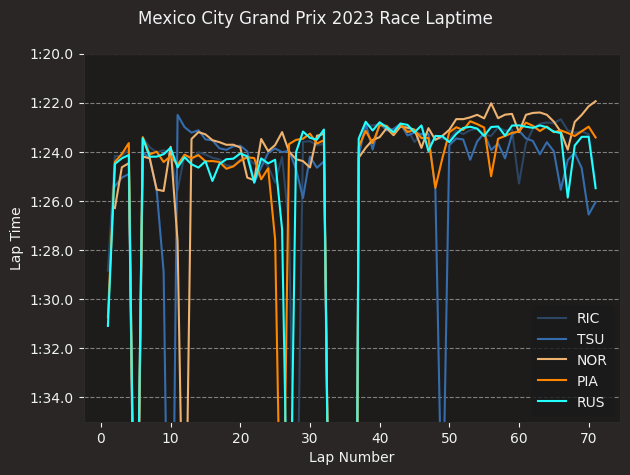

In [15]:
ff1.laptime_comperition(session_race, ['3', '22', '4', '81', '63'], 80, 95)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

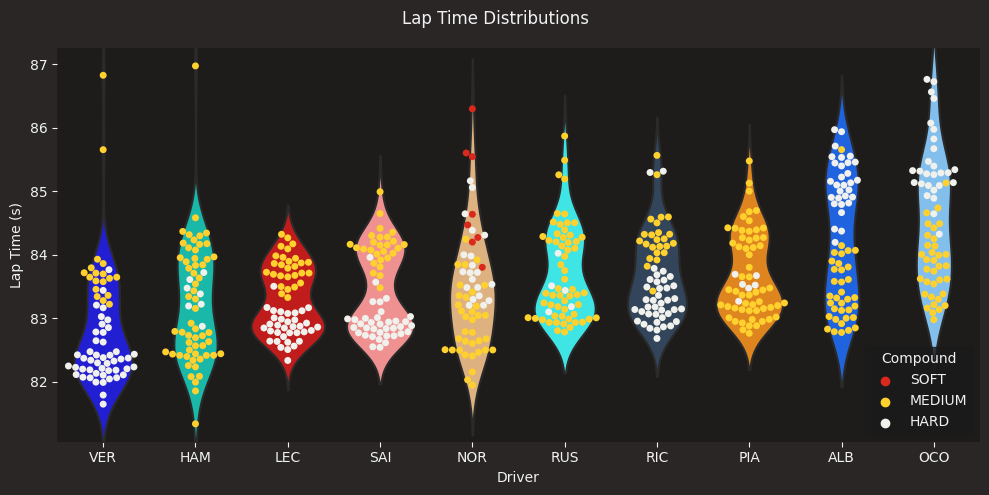

In [5]:
ff1.laptime_distribution(session_race)

/work/fastf1-libs/libs/fastf1lib.py:397: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '#dc0000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  telemetry.loc[telemetry['Fastest_drv'] == d1, 'Fastest_drv_int'] = d1_color


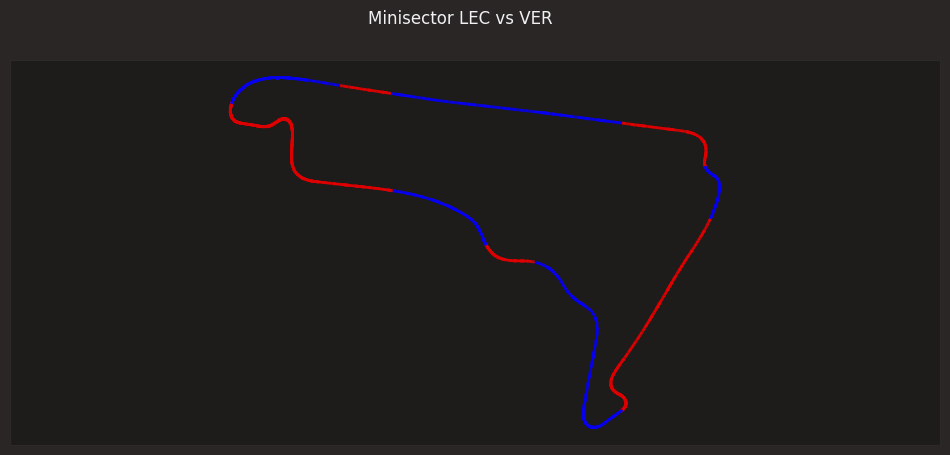

In [17]:
ff1.minisector_compare(session_qual, 'LEC', 'VER')

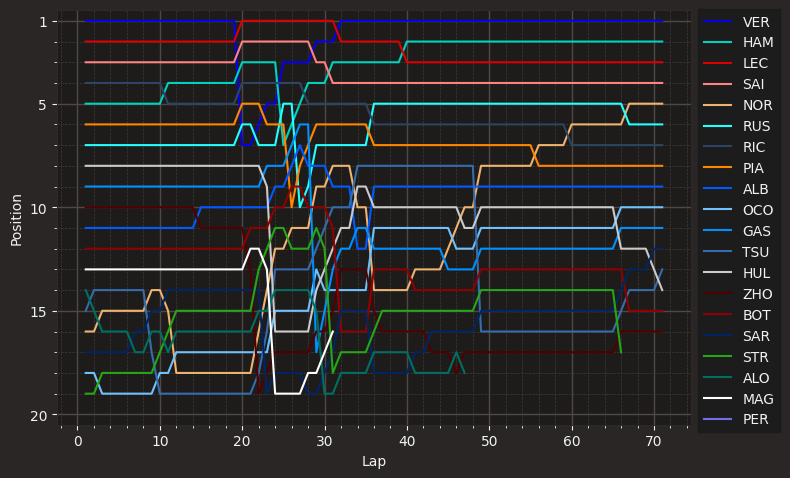

In [18]:
ff1.position_changes(session_race)

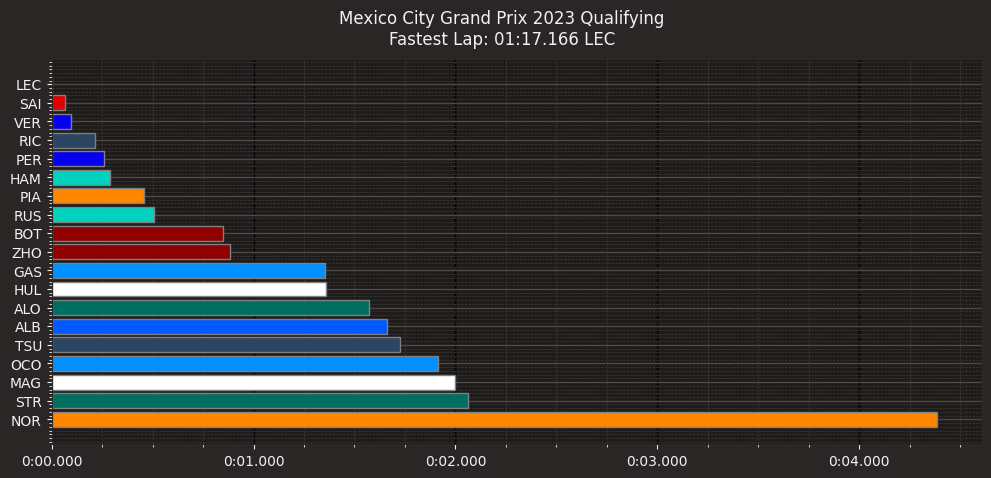

In [19]:
ff1.quali_result(session_qual)

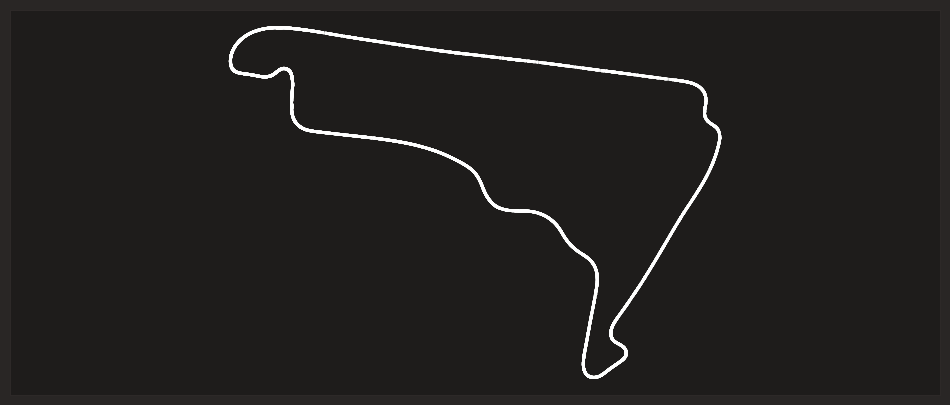

In [20]:
ff1.slick_vs_wet(session_race, 51)

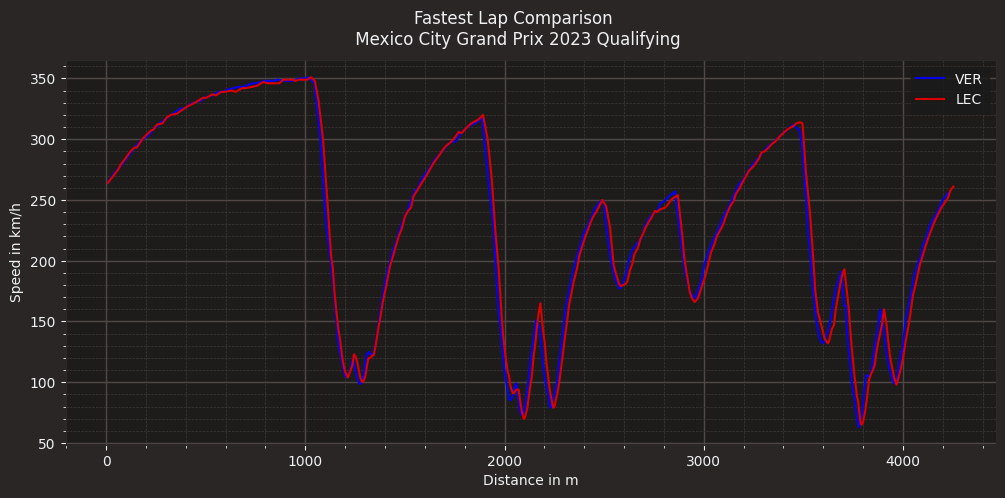

In [21]:
ff1.speed_compare(session_qual, 'VER', 'LEC')

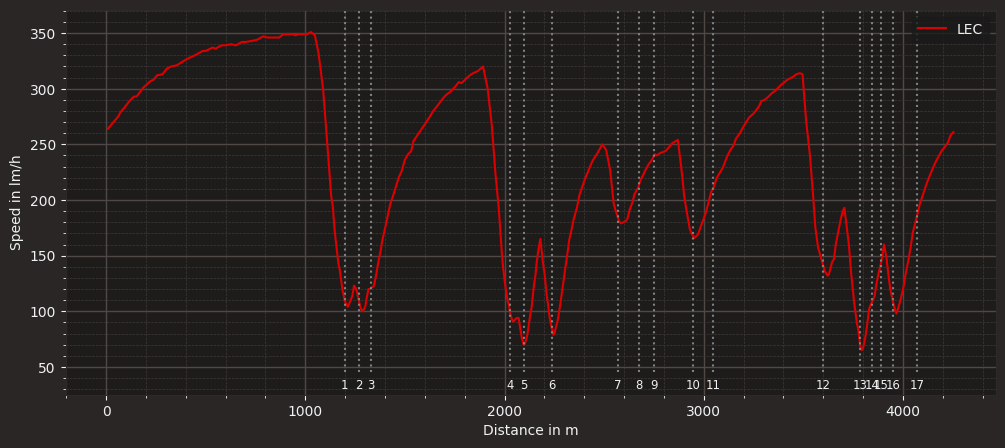

In [22]:
ff1.speed_traces(session_qual)

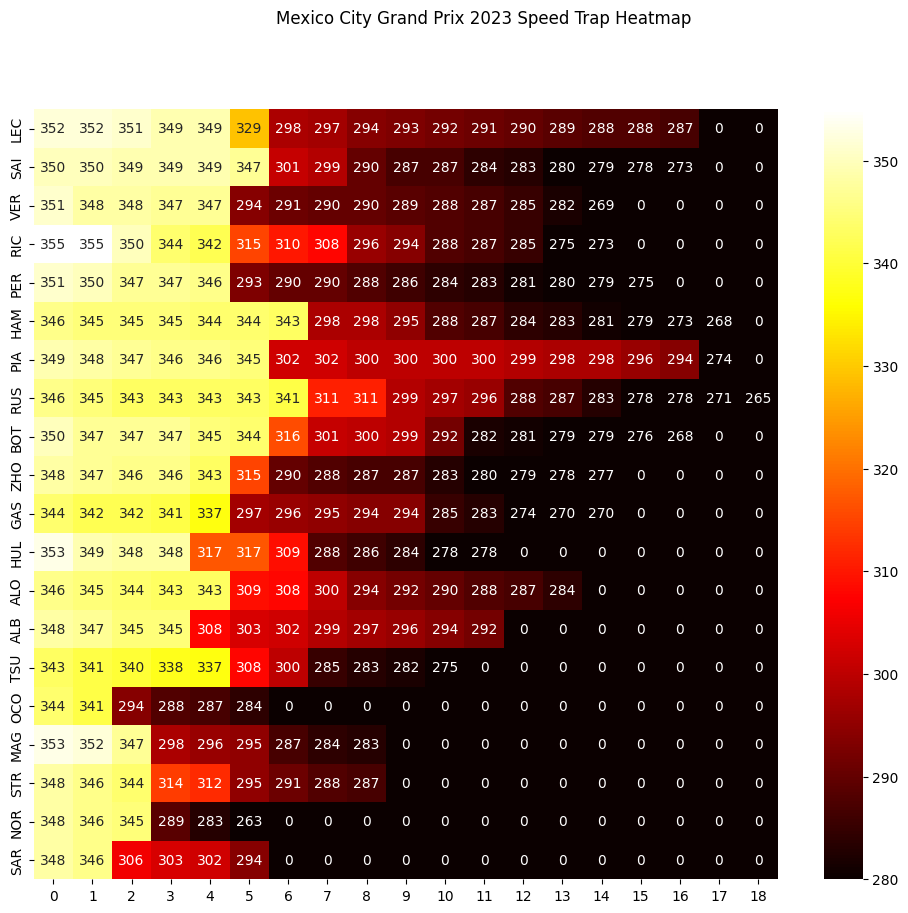

In [4]:
ff1.speedtrap_heatmap(session_qual, 20, 280)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


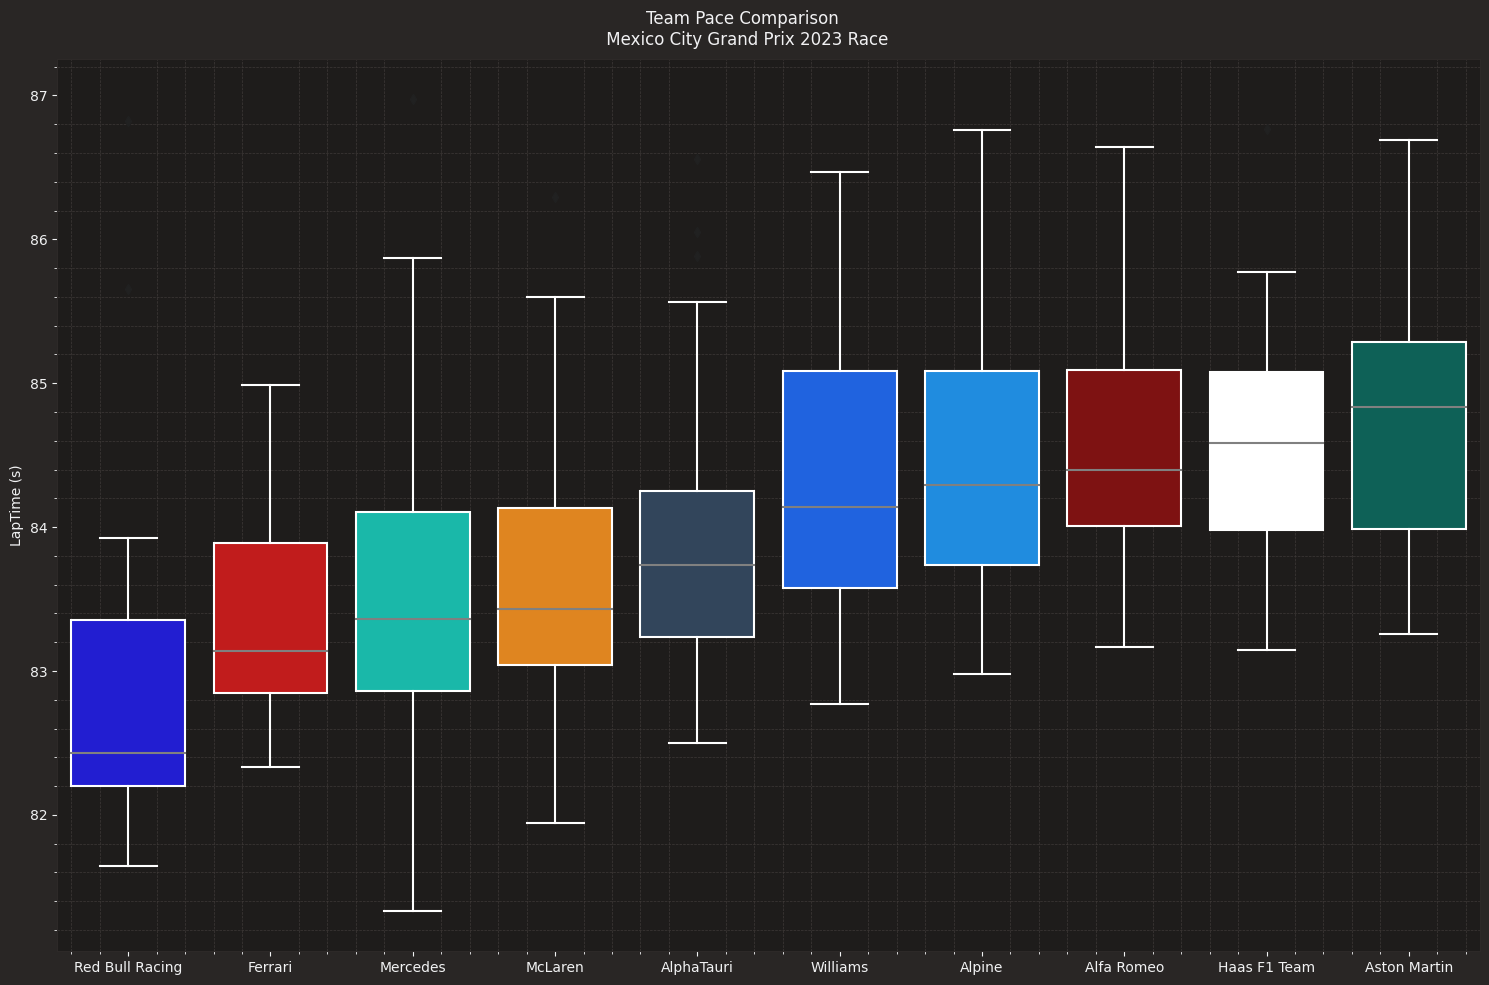

In [25]:
ff1.team_comparison(session_race)

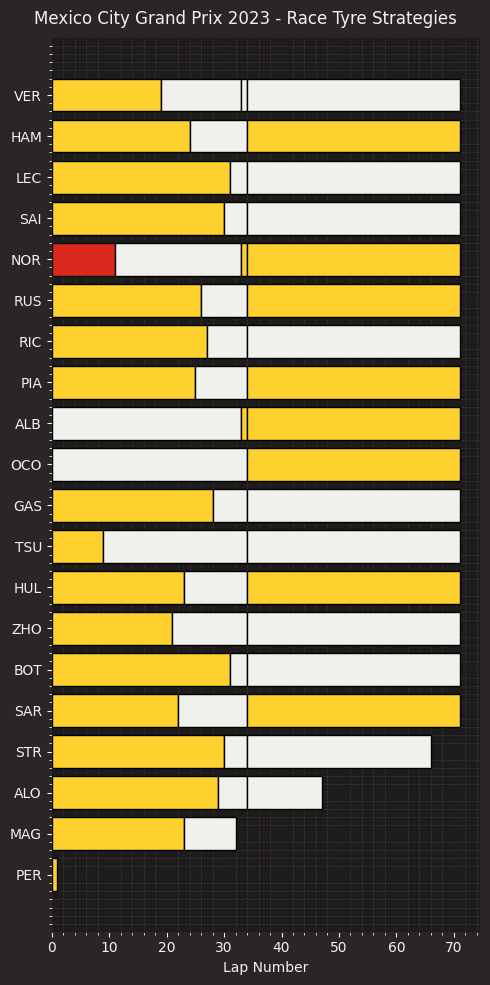

In [26]:
ff1.tyre_strategies(session_race)